# User Churn Prediction System - EDA Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Let's import data..

In [20]:
import pandas as pd

df = pd.read_csv("data/Telco_churn_after_DC.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's caheck some basic info..

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn,days_since_signup,days_since_last_payment,payment_delay,signup_missing,payment_missing
count,8000.00000,8000.000000,8000.000000,0.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,59.93500,73.440074,4613.038707,NaN,37335.939250,35342.413250,0.999875,0.403750,0.098375
std,34.27562,56.016845,7168.577841,NaN,1089.477692,2750.642381,0.011180,0.490679,0.297840
min,0.00000,-43.480000,-1839.460000,NaN,35026.000000,0.000000,0.000000,0.000000,0.000000
25%,31.00000,51.052500,1838.972500,NaN,36412.750000,34252.500000,1.000000,0.000000,0.000000
50%,59.00000,70.830000,3500.385000,NaN,37790.000000,35438.000000,1.000000,0.000000,0.000000
75%,89.00000,90.532500,5676.715000,NaN,38312.000000,36742.500000,1.000000,1.000000,0.000000
max,120.00000,1323.000000,133516.350000,NaN,38312.000000,38312.000000,1.000000,1.000000,1.000000


In [23]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

* **Churn Distribution**

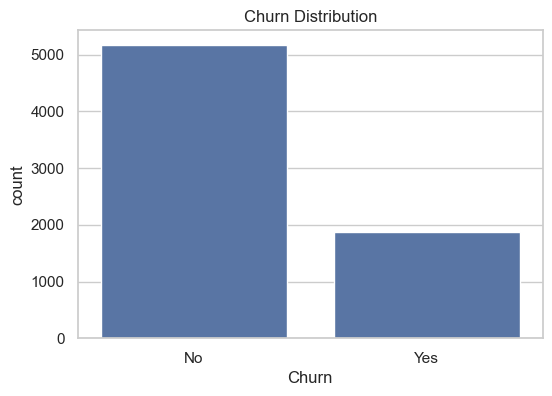

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

The dataset shows that the majority of customers do not churn, while a smaller but significant percentage do leave.

* **Numerical Columns Distrubution**

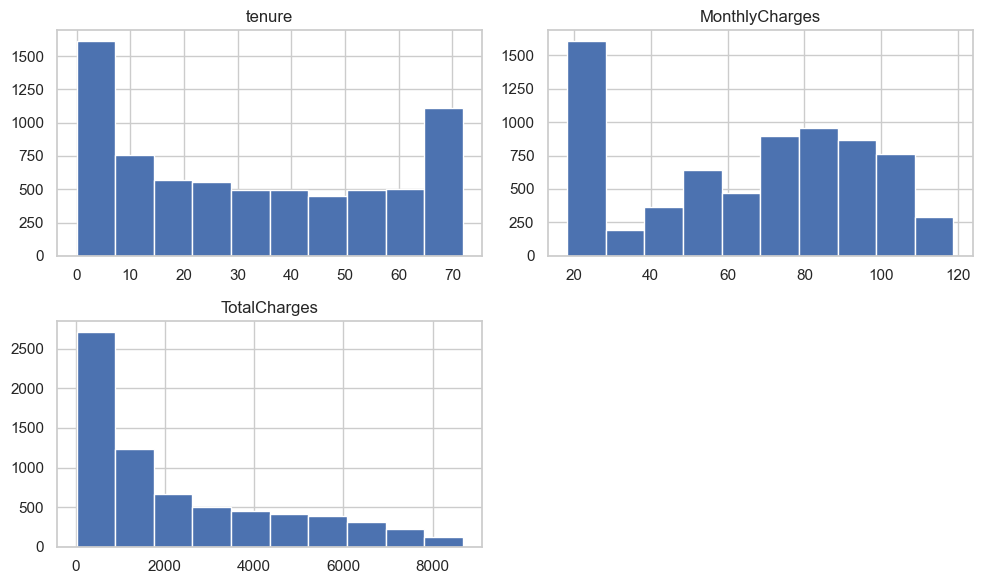

In [26]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_cols].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


Churners usually have very low tenure many leave within the first few months.

If users survive past early months, they are significantly more likely to stay.

This highlights the need for strong onboarding, early engagement campaigns, and first-90-days retention strategies.

* **Churn and Numerical Feature**

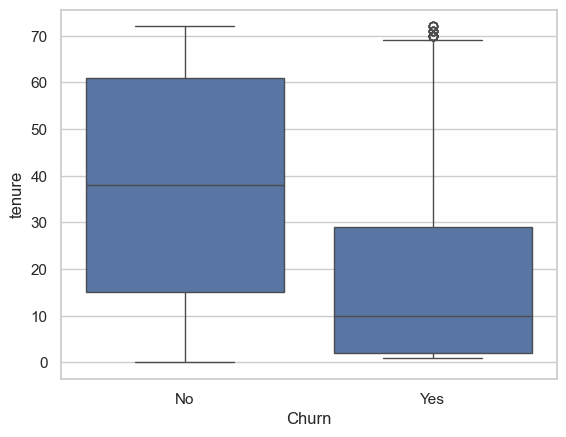

In [27]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.show()

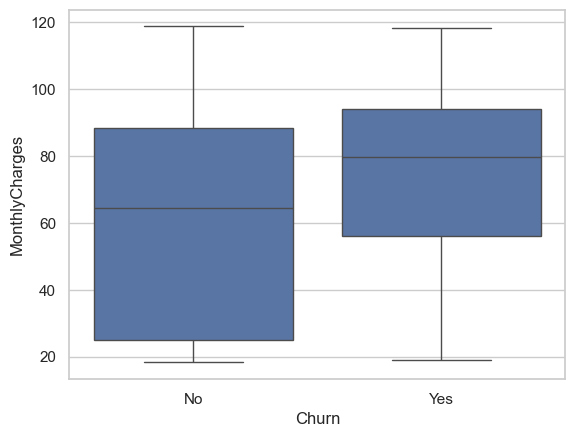

In [28]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.show()

Users who churn typically have higher monthly charges than those who stay.

High pricing may be contributing to dissatisfaction or lower perceived value.

Price-sensitive churn mitigation could reduce customer loss.

* **Churn and Categorical Features**

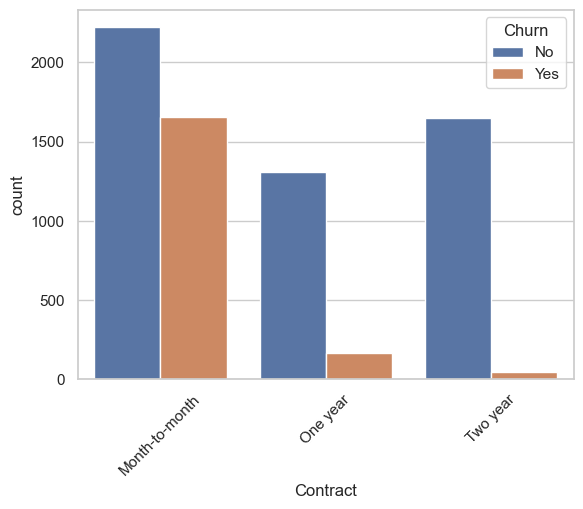

In [29]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.xticks(rotation=45)
plt.show()

Month-to-month users churn the most, while annual or two-year contracts have much lower churn.

This suggests contract lock-in increases retention, likely due to switching barriers and discounts.

A strong business recommendation is offer incentives to move monthly users into longer contracts.

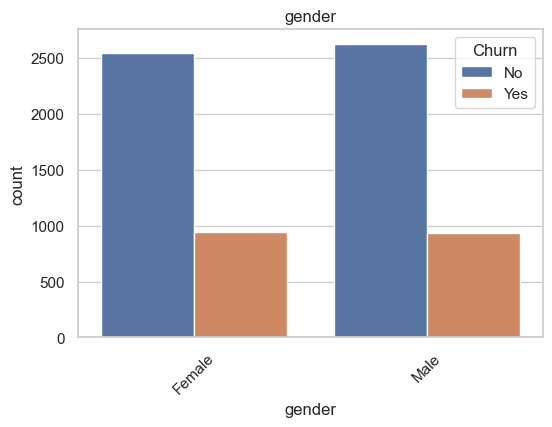

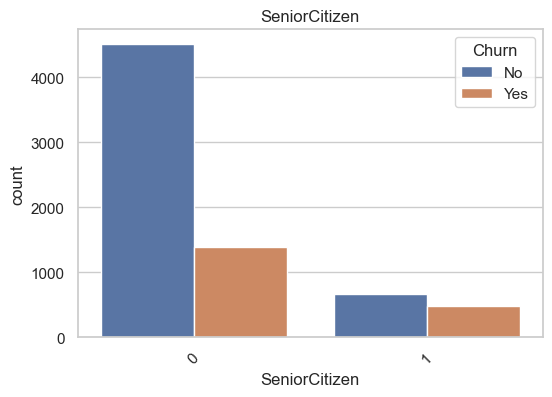

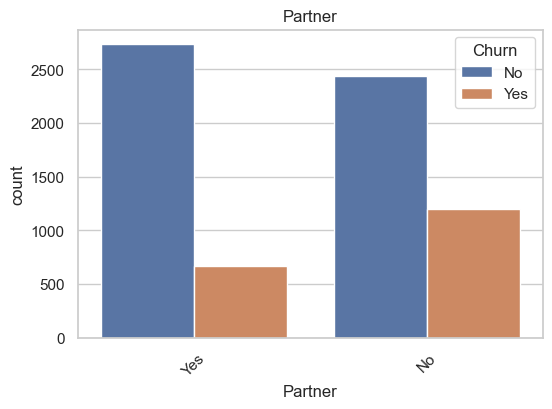

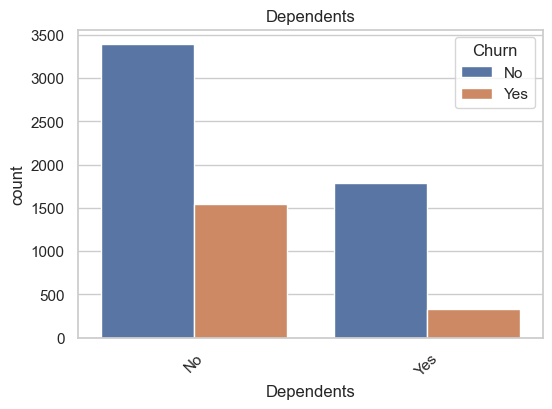

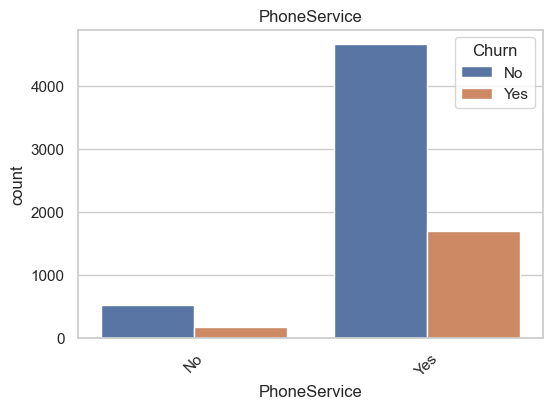

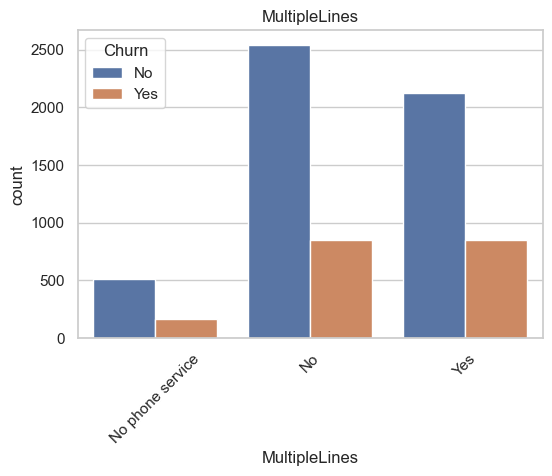

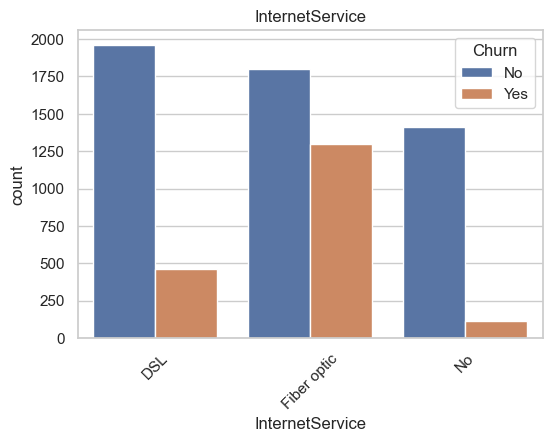

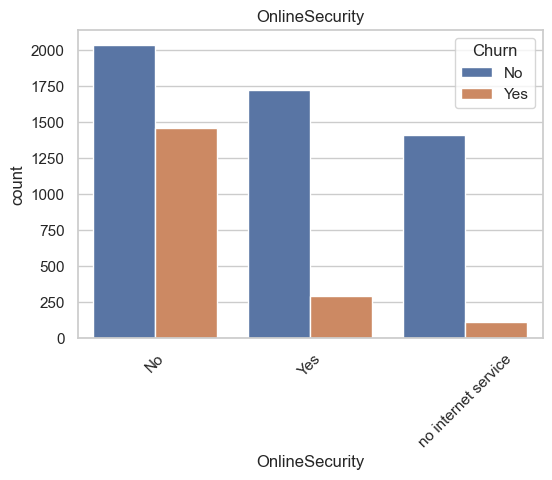

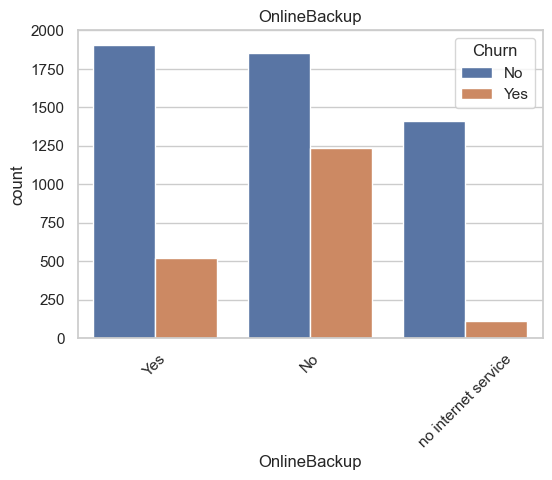

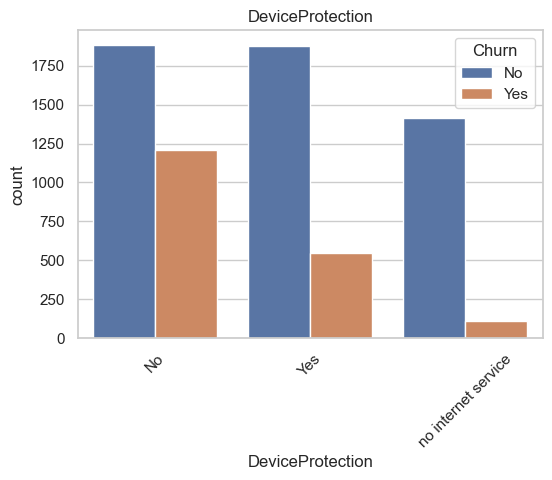

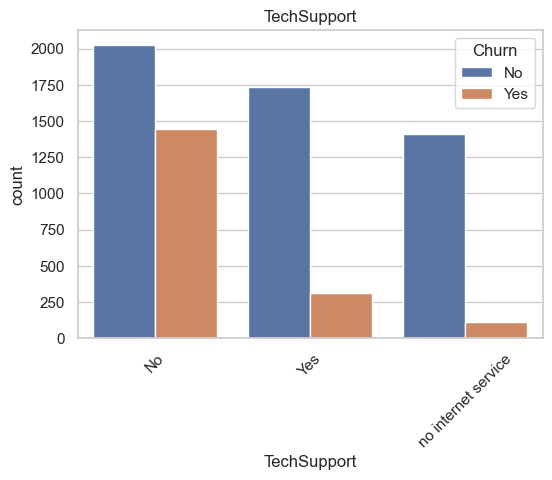

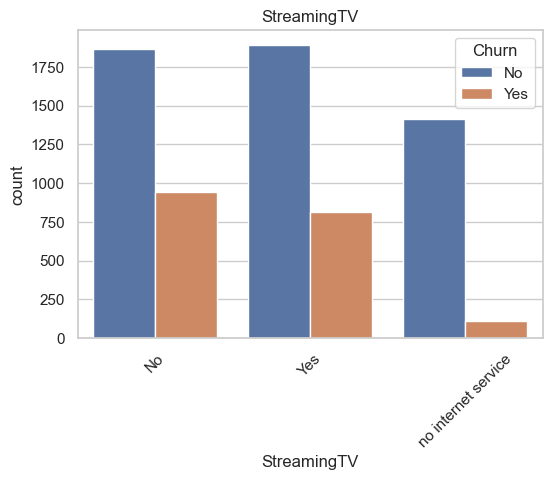

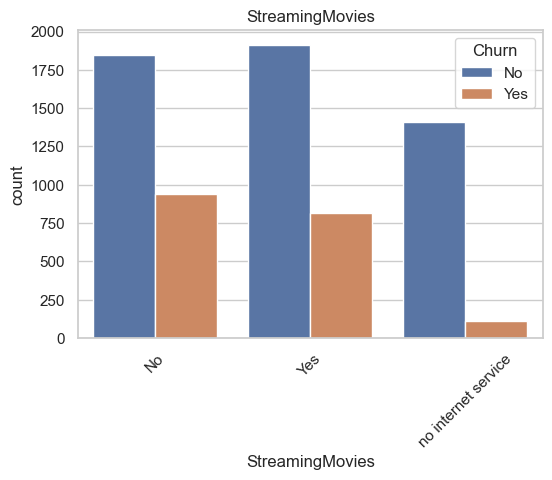

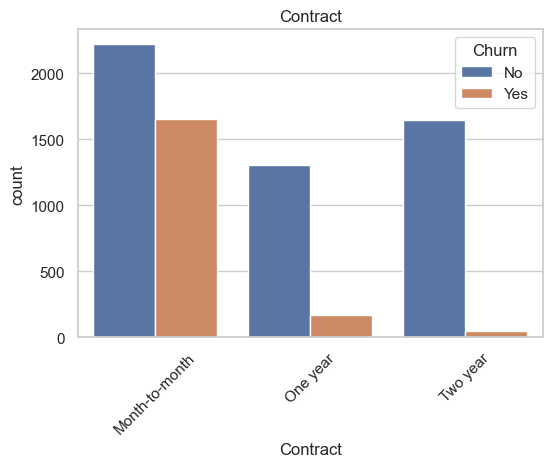

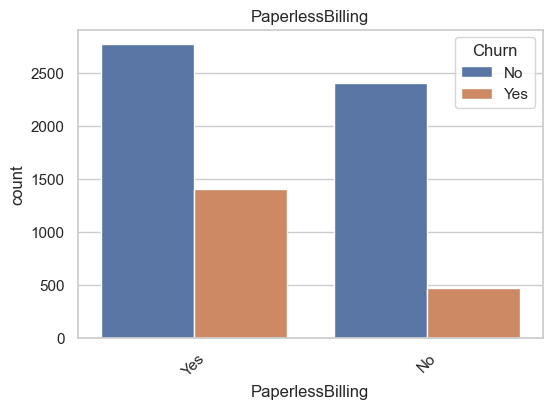

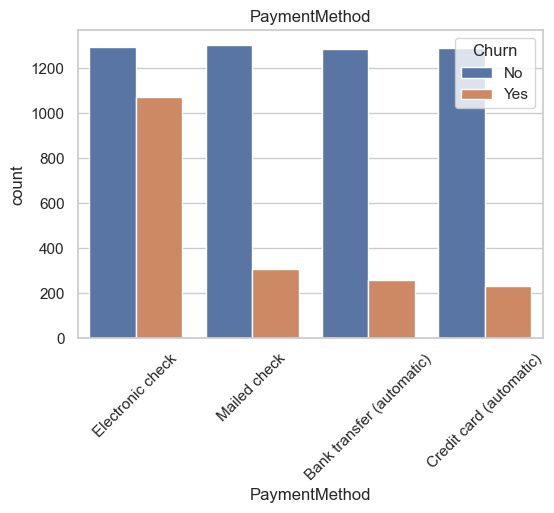

In [30]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'Contract','PaperlessBilling','PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


* **Correlation Heatmap**

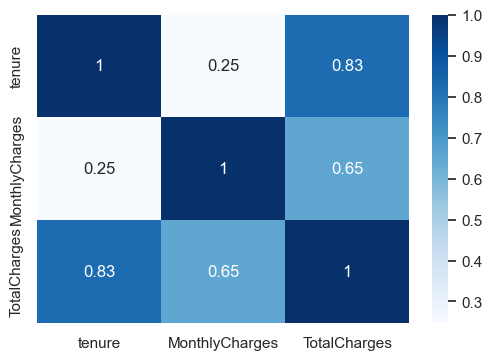

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.show()


Tenure and Total Charges show a very strong positive correlation, meaning users who stay longer naturally accumulate higher total spend.

Monthly Charges also correlate positively with Total Charges, but not as strongly as tenure.

This tells us long-term retention directly drives revenue, making churn prevention financially impactful.

**Conclusion**


Most churned customers have shorter tenure and higher monthly charges, showing that early dissatisfaction drives drop-offs.
Service add-ons and long-term contracts strongly reduce churn, indicating that customer value and commitment improve retention.
